In [1]:
import nbimporter;

#from UTILS.data_reformat import 
from UTILS.data_preprocessing_py import set_timestamp_as_index_old, pad_nans, fix_bad_samples, normalize_data, denormalize_data, time_resampling_old
from UTILS.anns_utils_py import predictions_to_df, predict_time_window, df_to_shifted_tables, build_multiparamiters_model
from UTILS.io_utils import df_from_csv, plot_save_fig, df_to_csv
from UTILS.diagrams_utils import build_histogram, plot_all_dfs
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(list(plt.style.available)[11])
%matplotlib inline
         
COLUMN_NAMES = ['Momentary current consuption', 'Momentary energy consumption', 'Momentary power consumption']

# FILE_NAME = '6000_frames_20221124'
FILE_NAME = '6000_frames_20221125'

df = df_from_csv(FILE_NAME + '.pkl',path = 'data/Origin_pkl/')

df = time_resampling_old(df, new_resampled_rate = '1T', format='%Y-%m-%d %H:%M:%S')

CUT=50   #01_07 =50 Momentary energy consumption  05_07 =50 Battery cell voltage
WINDOW = 12


df_fixed = fix_bad_samples(df, WINDOW, 1.5);

COUNT_NEURONS = 12; 
LEARN_COUNT = 330#120 #96#100
EPOCH_COUNT = 200
# df = df.iloc[0:400,:]

Manual Mode active
>>>  0.04588188685701693 -0.37037037037037035 0.462962962962963
Automatic Mode active
>>>  0.04588188685701693 -0.46296296296296297 0.5
Docking Mode active
>>>  0.0 0.0 0.0
PLC fault active
>>>  0.018084882014782477 -0.03383714596949891 0.22916666666666666
PLC warning Active
>>>  0.16136261714552896 -0.6955910910614743 0.7899369238607049
PLC diagnostic message active
>>>  1.1102230246251565e-16 1.1102230246251565e-16 0.5
LED Active
>>>  1.1102230246251565e-16 1.1102230246251565e-16 0.5
LEG RGB - External control active
>>>  0.0 0.0 0.0
LED RGB Strip 1 left - R
>>>  0.12242019702232203 -0.23591711009223726 0.3064259115172652
LED RGB Strip 2 right - R
>>>  0.08362487663570585 -0.36871253687019506 0.39187249992220075
LED RGB Strip 1 left - G
>>>  0.13035254031496443 -0.4387860904655033 0.45327397424606136
LED RGB Strip 2 right - G
>>>  0.09184697204718655 -0.4387860904655033 0.4518253968253968
LED RGB Strip 1 left - B
>>>  0.11957969463580799 -0.4687684544592439 0.60731

/Users/olena/myProjects/bitbucket/agv_ann/ANNs/UTILS/data_preprocessing_py.py:108: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_col_res[n] = mean[n];
/Users/olena/myProjects/bitbucket/agv_ann/ANNs/UTILS/data_preprocessing_py.py:108: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df_col_res[n] = mean[n];
/Users/olena/myProjects/bitbucket/agv_ann/ANNs/UTILS/data_preprocessing_py.py:108: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[

In [14]:
# df = df.iloc[CUT:]
# df_fixed = df_fixed.iloc[CUT:]

(466, 48)
(466, 48)
(466, 48)
(466, 48)
(466, 48)
(466, 48)


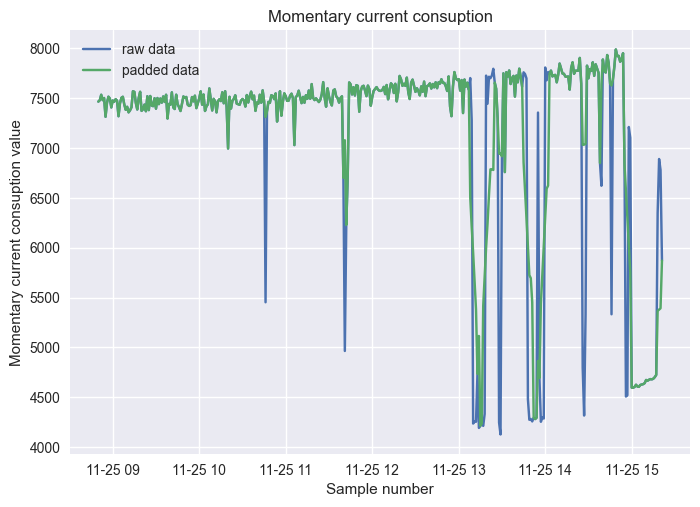

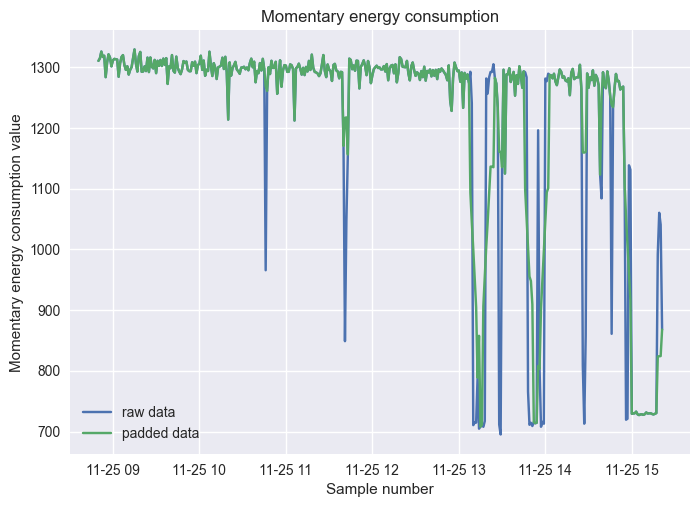

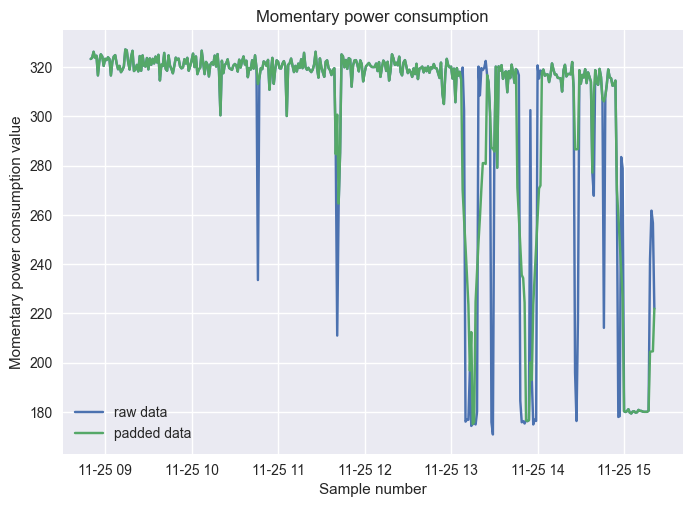

In [15]:
plt.close('all')
plot_all_dfs([df, df_fixed], COLUMN_NAMES, CUT+WINDOW, -WINDOW, legends = ["raw data", "padded data"])
plot_save_fig(FILE_NAME + '.png', COLUMN_NAMES);

In [16]:
# Normalization of data from 0 to 1
# Нормалізація даних від 0 до 1

df_fixed, min_max = normalize_data(df_fixed[COLUMN_NAMES][CUT:-WINDOW]);
# df_fixed, min_max = normalize_data(df_fixed[COLUMN_NAMES]);
df_to_csv(df_fixed, FILE_NAME+'_normalize.csv')
# df_fixed.plot();

In [17]:

x_train, y_train, x_test, y_test = df_to_shifted_tables(df_fixed, COUNT_NEURONS, LEARN_COUNT)
# x_train, y_train, x_test, y_test = df_to_shifted_tables(df_fixed[WINDOW:-WINDOW][COLUMN_NAMES], COUNT_NEURONS, LEARN_COUNT)
model = build_multiparamiters_model(COLUMN_NAMES, COLUMN_NAMES, COUNT_NEURONS, hiden_layer_neurons = 8)#8)
model.fit(x_train, y_train, epochs = EPOCH_COUNT, batch_size = 10)

# assessment of the quality of the model on the test set 
# оцінка якості моделі на тестовій множині
scores = model.evaluate(x_test, y_test)

# Predict
# Обраховуємо прогноз
predictions = model.predict(x_test)

# We calculate the fit
# Обраховуємо підгонку
predictions_train = model.predict(x_train)

#Time window
# Часові вікна
PROGNOZED_COUNT = y_test.shape[0]
ptw = predict_time_window(y_train, model, PROGNOZED_COUNT)

 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
Epoch 1/200
33/33 [==============================] - 0s 6ms/step - loss: 2.0818 - out_Momentary_current_consuption_loss: 0.0439 - out_Momentary_energy_consumption_loss: 1.9559 - out_Momentary_power_consumption_loss: 0.0820 - out_Momentary_current_consuption_mean_absolute_error: 0.1459 - out_Momentary_energy_consumption_mean_absolute_error: 1.3307 - out_Momentary_power_consumption_mean_absolute_error: 0.2154
Epoch 2/200
33/33 [==============================] - 0s 7ms/step - loss: 0.1546 - out_Momentary_current_consuption_loss: 0.0247 - out_Momentary_energy_consumption_loss: 0.1200 - out_Momentary_power_consumption_loss: 0.0099 - out_Momentary_current_consuption_mean_absolute_error: 0.0974 - out_Momentary_energy_consumption_mean_absolute_error: 0.2718 - out_Momentary_power_consumption_mean_absolute_error: 0.0709
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 0.0580 

/Users/olena/myProjects/bitbucket/agv_ann/ANNs/UTILS/anns_utils_py.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_predictions = pd.concat([df_predictions, df_predicted]);


1/1 [==============================] - 0s 8ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy consumption
 -- Momentary power consumption
1/1 [==============================] - 0s 7ms/step
 -- Momentary current consuption
 -- Momentary energy c

215.99528308774296
746.0822788422984
785.6041826232897
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)


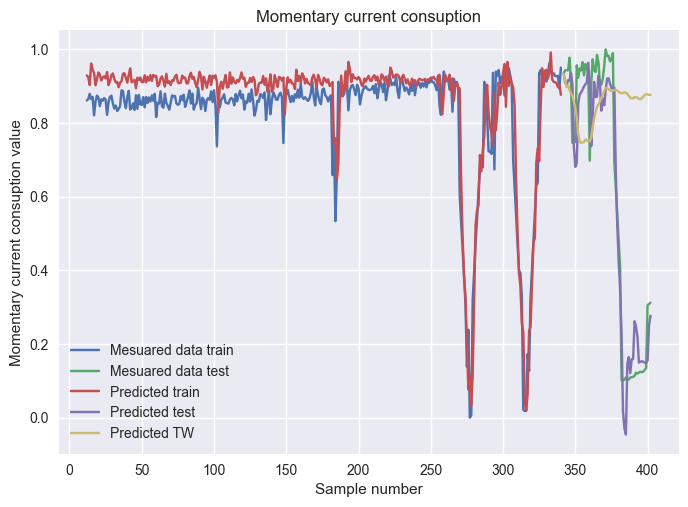

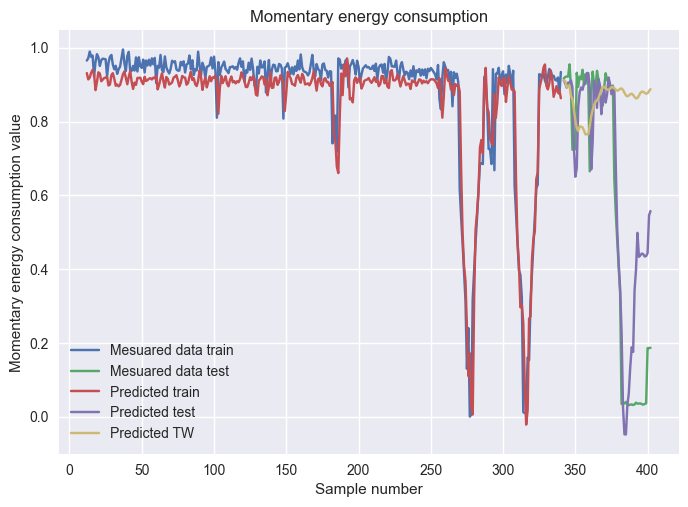

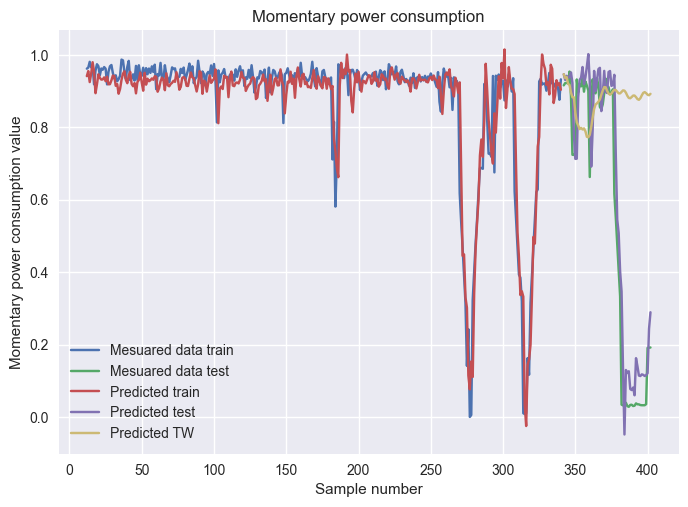

In [18]:
# x_2 = np.arange (0, LEARN_COUNT, 1)
# x_3 = np.arange (LEARN_COUNT, LEARN_COUNT + PROGNOZED_COUNT, 1)

# y_train.index = x_2;
# y_test.index = x_3

# df_predictions_train = predictions_to_df(predictions_train, COLUMN_NAMES);
# df_predictions_train.index = x_2;
# df_predicted = predictions_to_df(predictions, COLUMN_NAMES);
# df_predicted.index = x_3;
# ptw.index = x_3;
df_predictions_train = predictions_to_df(predictions_train, COLUMN_NAMES);
df_predictions_train.index = y_train.index;
df_predicted = predictions_to_df(predictions, COLUMN_NAMES);
df_predicted.index = y_test.index;

from sklearn.metrics import mean_absolute_percentage_error
for col in ptw.columns:
    print(mean_absolute_percentage_error(y_test[col], ptw[col])*100)
    
plot_all_dfs([y_train, y_test, df_predictions_train, df_predicted, ptw], COLUMN_NAMES, 0, -1, legends = ['Mesuared data train', 'Mesuared data test', 'Predicted train', 'Predicted test', 'Predicted TW'])

# plot_save_fig(FILE_NAME + '.png', COLUMN_NAMES);

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('train ', round(mean_absolute_error(y_train.iloc[:,0], df_predictions_train.iloc[:,0]),5),';', 
round(mean_absolute_error(y_train.iloc[:,1], df_predictions_train.iloc[:,1]),5))

print(round(mean_absolute_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5),';', 
round(mean_absolute_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5))


train  0.05248 ; 0.04565
0.07434 ; 0.12867


In [20]:
y_train = denormalize_data(y_train, min_max)
y_test = denormalize_data(y_test, min_max)
df_predictions_train = denormalize_data(df_predictions_train, min_max)
df_predicted = denormalize_data(df_predicted, min_max)
ptw = denormalize_data(ptw, min_max)

24.974818260545266
28.18292886223408
28.49070016369803
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)
(330, 3)
(62, 3)
(330, 3)
(62, 3)
(62, 3)


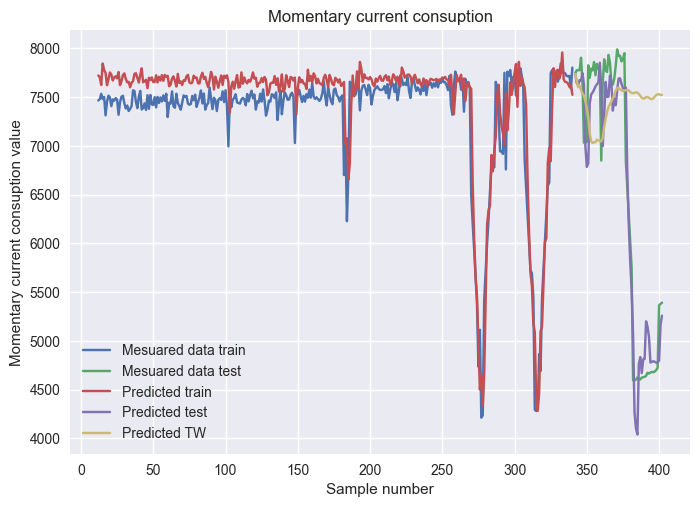

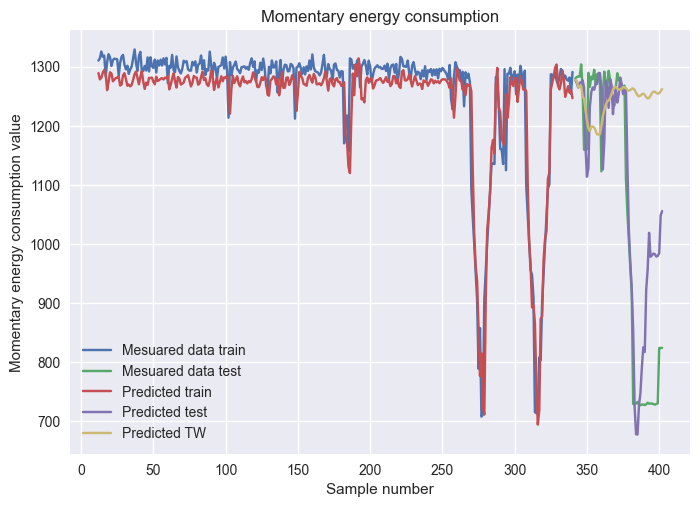

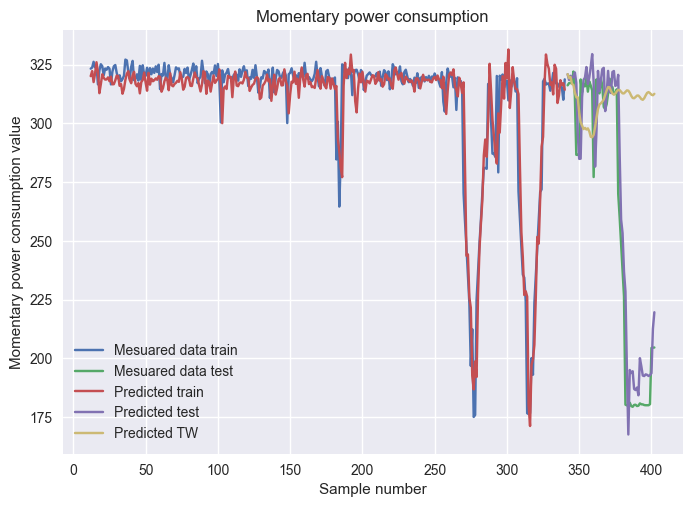

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
for col in ptw.columns:
    print(mean_absolute_percentage_error(y_test[col], ptw[col])*100)

plot_all_dfs([y_train, y_test, df_predictions_train, df_predicted, ptw], COLUMN_NAMES, 0, -1, legends = ['Mesuared data train', 'Mesuared data test', 'Predicted train', 'Predicted test', 'Predicted TW'])
plot_save_fig(FILE_NAME + '.png', COLUMN_NAMES);

(62, 3)
(62, 3)
(62, 3)
(62, 3)
(62, 3)
(62, 3)
(62, 3)
(62, 3)
(62, 3)


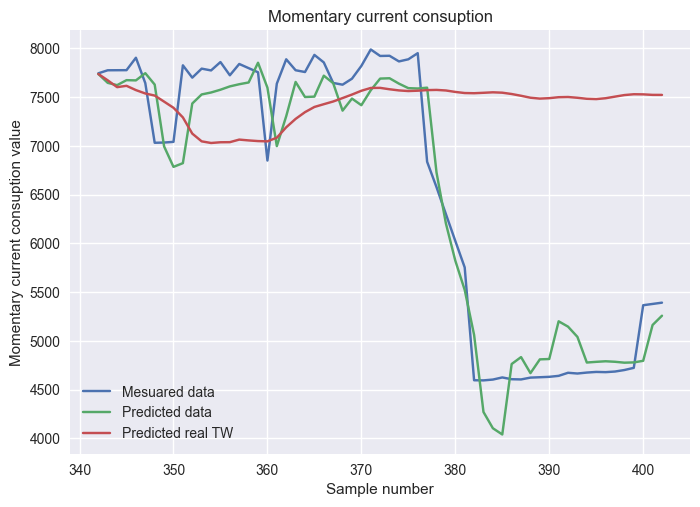

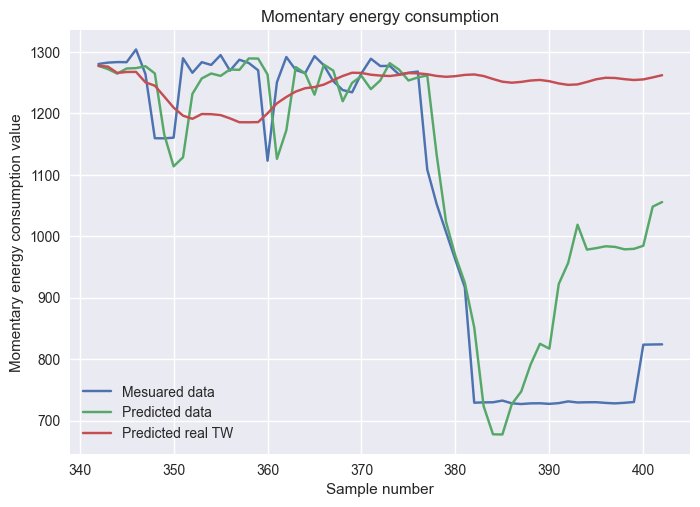

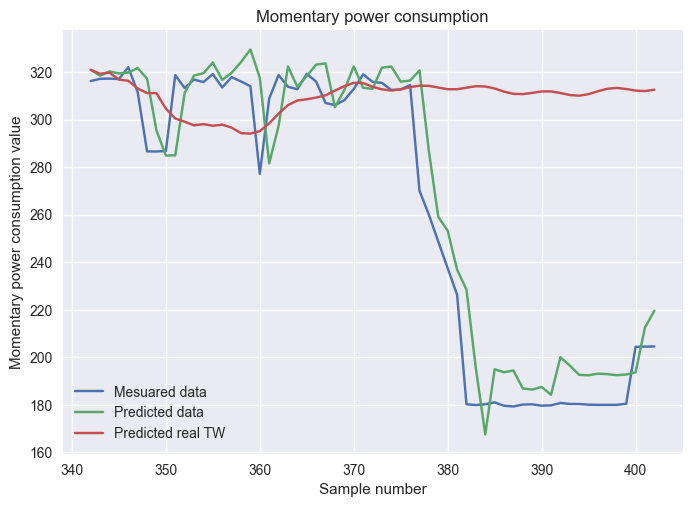

In [22]:
plot_all_dfs([y_test, df_predicted, ptw], COLUMN_NAMES, 0, -1, legends = ['Mesuared data', 'Predicted data', 'Predicted real TW'])
plot_save_fig(FILE_NAME + '_PredTW.png', COLUMN_NAMES);

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print('Learned data train')
mse = round(mean_squared_error(y_train.iloc[:,0],df_predictions_train.iloc[:,0]),5)
mae = round(mean_absolute_error(y_train.iloc[:,0],df_predictions_train.iloc[:,0]),5)
mape = round(mean_absolute_percentage_error(y_train.iloc[:,0],df_predictions_train.iloc[:,0]),5)
print("MSE: ", mse)
print("MAE: ", mae) 
print("MAPE: ", mape*100, "%") 

mse = round(mean_squared_error(y_train.iloc[:,1],df_predictions_train.iloc[:,1]),5)
mae = round(mean_absolute_error(y_train.iloc[:,1],df_predictions_train.iloc[:,1]),5)
mape = round(mean_absolute_percentage_error(y_train.iloc[:,1],df_predictions_train.iloc[:,1]),5)
print("MSE: ", mse)
print("MAE: ", mae) 
print("MAPE: ", mape*100, "%") 

# mse = round(mean_squared_error(y_train.iloc[:,2],df_predictions_train.iloc[:,2]),5)
# mae = round(mean_absolute_error(y_train.iloc[:,2],df_predictions_train.iloc[:,2]),5)
# mape = round(mean_absolute_percentage_error(y_train.iloc[:,2],df_predictions_train.iloc[:,2]),5)
# print("MSE: ", mse)
# print("MAE: ", mae) 
# print("MAPE: ", mape*100, "%") 


print('Predicted data test')
mse = round(mean_squared_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)
mae = round(mean_absolute_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)
mape = round(mean_absolute_percentage_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)
print("MSE: ", mse)
print("MAE: ", mae) 
print("MAPE: ", mape*100, "%") 

print('Predicted data test')
mse = round(mean_squared_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)
mae = round(mean_absolute_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)
mape = round(mean_absolute_percentage_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)
print("MSE: ", mse)
print("MAE: ", mae) 
print("MAPE: ", mape*100, "%") 

# print('Predicted data test')
# mse = round(mean_squared_error(y_test.iloc[:,2], df_predicted.iloc[:,2]),5)
# mae = round(mean_absolute_error(y_test.iloc[:,2], df_predicted.iloc[:,2]),5)
# mape = round(mean_absolute_percentage_error(y_test.iloc[:,2], df_predicted.iloc[:,2]),5)
# print("MSE: ", mse)
# print("MAE: ", mae) 
# print("MAPE: ", mape*100, "%") 

# print(round(mean_absolute_percentage_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)*100,';', 
# round(mean_absolute_percentage_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)*100,';',
# round(mean_absolute_percentage_error(y_test.iloc[:,2], df_predicted.iloc[:,2]),5)*100)

# print(round(mean_absolute_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)*100,';', 
# round(mean_absolute_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)*100)

# print(round(mean_absolute_percentage_error(y_test.iloc[:,0], df_predicted.iloc[:,0]),5)*100)#,';', 
# round(mean_absolute_percentage_error(y_test.iloc[:,1], df_predicted.iloc[:,1]),5)*100#)

Learned data train
MSE:  67402.43648
MAE:  198.08598
MAPE:  2.803 %
MSE:  1517.30612
MAE:  28.49575
MAPE:  2.385 %
Predicted data test
MSE:  122593.74326
MAE:  280.58263
MAPE:  4.479 %
Predicted data test
MSE:  14462.36517
MAE:  80.3169
MAPE:  9.526 %
